# Lesson 5
Now that we have covered some basics, we can have a look a the true power of Python. In this lesson, I want to cover the most widely used libraries in science/economics.

The libraries I want to cover are:

1. Numpy
2. Pandas
3. Scipy

Since those libraries are huge, I just want to provide an illustration of what they can be used for.

Assuming you have already installed the required library (e.g. via pip), all that we have to do to use a library is to import it.

### Numpy: Efficient library for linear algebra

In [11]:
# Import numpy and abbreviate it as np
import numpy as np

# Create array (aka matrix) of ones
A = np.array([[1, 2], [3, 4]]) # Note that we are passing in a list of lists!
print(A)

[[1 2]
 [3 4]]


In [12]:
# Slicing arrays works similar to slicing lists
# Grab first column
print(A[:, 0]) # Don't forget that Python uses zero-based indexing!

[1 3]


In [13]:
# Grab first row
print(A[0, :])

[1 2]


In [14]:
# Multiplication
B = np.eye(2)

C = A * B # Note that this syntax will perform element-wise multiplication.
C

array([[1., 0.],
       [0., 4.]])

In [15]:
C = np.dot(A, B) # np.dot() will perform matrix multiplication.
C

array([[1., 2.],
       [3., 4.]])

In [16]:
# Transpose and inverse
At = A.transpose()
print('Transpose of matrix A:\n', At)

# Inverse
Ai = np.linalg.inv(A)
print('Inverse of matrix A:\n', Ai)

Transpose of matrix A:
 [[1 3]
 [2 4]]
Inverse of matrix A:
 [[-2.   1. ]
 [ 1.5 -0.5]]


As mentioned before, `numpy` is a big and widely used library. For more information, check out the `numpy` homepage: https://numpy.org/

### Pandas
`pandas` is a Python library for data analysis. According to its website, `pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

For more information see: https://pandas.pydata.org/

In [17]:
# Let's import the pandas library. The convention is to abbreviate it as 'pd'
import pandas as pd

# The basic data type in pandas is a pd.Series, which you can think of as a column of your data
# Let's create a random pd.Series using numpy
s = pd.Series(np.random.randn(5))
print(type(s))
print() # Just an empty line for readability.
print(s)

<class 'pandas.core.series.Series'>

0   -0.593023
1   -0.944070
2   -0.594634
3   -1.808245
4   -0.383047
dtype: float64


In [18]:
# Commonly we will work with multiple variables. These are organized in a pd.DataFrame.
# Each DataFrame has an index (both for rows and cols). Let's create a pd.DataFrame.
df = pd.DataFrame(np.random.randn(8, 3), columns=["A", "B", "C"])

print(type(df))
print() # Just an empty line for readability.

# Let's check out what this looks like
df.head()

<class 'pandas.core.frame.DataFrame'>



,A,B,C
0,0.868957,0.313824,-0.784048
1,-0.336540,-0.089911,-0.450658
2,1.635356,-0.541502,0.725621
3,1.199637,0.097113,-1.433792
4,-0.475890,-0.876848,-0.498431


In [19]:
# Let's use actual data rather some randomly generated numbers.
# We can get some data on stock prices using the package fastquant.
# We want to import only one function from fastquant
import yfinance as yf

# Grab time-series data for GameStop ($GME)
df = yf.download('GME', start='2018-01-01', end='2022-02-28')

print(type(df))

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


In [20]:
# Inspect
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,17.959999,18.290001,17.780001,18.260000,15.953856,2832700
2018-01-03,18.290001,18.370001,17.920000,18.200001,15.901434,3789200
2018-01-04,18.200001,18.379999,17.959999,18.320000,16.006279,2781300
2018-01-05,18.379999,18.730000,18.219999,18.680000,16.320812,3019000
2018-01-08,18.799999,19.400000,18.799999,19.230000,16.801350,3668400


In [21]:
# Some quick summary stats of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1.046000e+03
mean,52.590363,55.598604,49.604034,52.246262,51.912474,7.472836e+06
std,75.759959,80.892671,70.682820,74.849341,75.017554,1.540151e+07
min,2.850000,2.940000,2.570000,2.800000,2.800000,8.170000e+05
25%,5.662500,5.902500,5.492500,5.705000,5.705000,2.478650e+06
50%,13.680000,13.980000,13.340000,13.660000,12.652687,3.723650e+06
75%,90.532501,97.250000,60.352501,86.697500,86.697500,6.145575e+06
max,379.709991,483.000000,291.510010,347.510010,347.510010,1.971579e+08


In [22]:
# Pandas has quite advanced indices. The get_stock_data function returned an pd.DataFrame with a DatetimeIndex.
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', name='Date', length=1046, freq=None)

In [23]:
# We can grab single columns from the pd.DataFrame
df['Open'].head()

Date
2018-01-02    17.959999
2018-01-03    18.290001
2018-01-04    18.200001
2018-01-05    18.379999
2018-01-08    18.799999
Name: Open, dtype: float64

In [24]:
# We can slice rows
df[0:10] # by row number

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,17.959999,18.290001,17.780001,18.260000,15.953856,2832700
2018-01-03,18.290001,18.370001,17.920000,18.200001,15.901434,3789200
2018-01-04,18.200001,18.379999,17.959999,18.320000,16.006279,2781300
2018-01-05,18.379999,18.730000,18.219999,18.680000,16.320812,3019000
2018-01-08,18.799999,19.400000,18.799999,19.230000,16.801350,3668400
2018-01-09,19.309999,19.750000,19.309999,19.549999,17.080933,3662600
2018-01-10,19.389999,19.920000,19.330000,19.680000,17.194519,4012800
2018-01-11,19.920000,20.309999,19.770000,19.959999,17.439154,4213100
2018-01-12,18.500000,18.540001,17.629999,17.760000,15.517005,15445800


In [25]:
# Check out dimensions
print(df.shape)
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

(1046, 6)
Our dataframe has 1046 rows and 6 columns.


In [26]:
# We can add a column
df['ratio_high_low'] = df.High / df.Low
df.ratio_high_low.head()

Date
2018-01-02    1.028684
2018-01-03    1.025112
2018-01-04    1.023385
2018-01-05    1.027991
2018-01-08    1.031915
Name: ratio_high_low, dtype: float64

In [27]:
# We can transform our data
df['log_close'] = df['Close'].apply(np.log)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ratio_high_low,log_close
Date,,,,,,,,
2018-01-02,17.959999,18.290001,17.780001,18.260000,15.953856,2832700,1.028684,2.904713
2018-01-03,18.290001,18.370001,17.920000,18.200001,15.901434,3789200,1.025112,2.901422
2018-01-04,18.200001,18.379999,17.959999,18.320000,16.006279,2781300,1.023385,2.907993
2018-01-05,18.379999,18.730000,18.219999,18.680000,16.320812,3019000,1.027991,2.927453
2018-01-08,18.799999,19.400000,18.799999,19.230000,16.801350,3668400,1.031915,2.956472


In [28]:
# Here we want to pick up on lambda functions again. They can be used with the apply method
df['close_minus_one'] = df['Close'].apply(lambda x: x - 1) # Any function can be applied with lambda.

# Let's check out if it worked
df[['Close', 'close_minus_one']].head()

,Close,close_minus_one
Date,,
2018-01-02,18.260000,17.260000
2018-01-03,18.200001,17.200001
2018-01-04,18.320000,17.320000
2018-01-05,18.680000,17.680000
2018-01-08,19.230000,18.230000


In [29]:
# We can also easly plot our data
import matplotlib.pyplot as plt # That's the ggplot of Python 
                                # but there even exists a ggplot wrapper for Python for die-hard fans of ggplot
    
# When we use jupyter notebooks, we need to run
%matplotlib inline 

<AxesSubplot:xlabel='Date'>

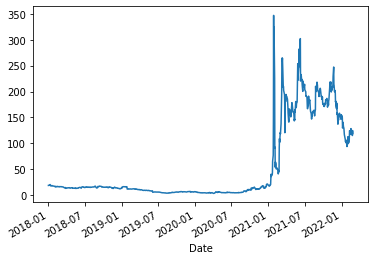

In [30]:
df.Close.plot()

There are of course many other things in the pandas ecosystem. If you ever work with data in Python using pandas you will also appreciate the great documentation as well as the active community of pandas.

### Scipy
Scipy is a library for (their words) fundamental algorithms for scientific computing. We can use it for optimization, integration, interpolation, etc. It's a big ecosystem and has an active community.

For more info, visit: https://scipy.org/

I will not go into great detail of scipy, but just to showcase what you can use it for we will use scipy's numerical optimization tools to minimize a function.

In [1]:
# Define function that we want to minimize
def squareScalar(x):
    return x ** 2

# Import scalar minimization
from scipy.optimize import minimize_scalar

# Minimize function
result = minimize_scalar(squareScalar, method='brent')
result

     fun: 0.0
    nfev: 8
     nit: 4
 success: True
       x: 0.0